<a href="https://colab.research.google.com/github/PatelAkashMafatlal/Yulu/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Yulu-Hypothesis Testing

# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Problem Statement

The company wants to know:



1.   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.   How well those variables describe the electric cycle demands






Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

upload the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bike_sharing_yulu.csv to bike_sharing_yulu.csv


Import the dataset

In [ ]:
df = pd.read_csv("bike_sharing_yulu.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Shape of the Dataset

In [ ]:
df.shape

(10886, 12)

Columns of the Dataset

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Colummn Profiling




*   datetime: datetime

*   season: season (1: spring, 2: summer, 3: fall, 4: winter)

*   holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

*   weather:

 1: Clear, Few clouds, partly cloudy, partly cloudy

 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   temp: temperature in Celsius

*   atemp: feeling temperature in Celsius

*   humidity: humidity

*   windspeed: wind speed

*   casual: count of casual users

*   registered: count of registered users

*   count: count of total rental bikes including both casual and registered





Is there presence of null values in whole Dataset?

In [ ]:
np.any(df.isnull())

False

Is there presence of duplicate values in whole Dataset?

In [ ]:
np.any(df.duplicated())

False

Datatype of columns

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Converting the datatype of datetime column from object to datetime

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

Time period

In [ ]:
df["datetime"].max()-df["datetime"].min()

Timedelta('718 days 23:00:00')

In [ ]:
df["day"]=df["datetime"].dt.day_name()

Trend of monthly average values for the 'casual','registered' and 'count' varibles.

# Using groupby

In [ ]:
df2 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df2.rename(columns = {'datetime' : 'month'}, inplace = True)
df2['prev_count'] = df2['count'].shift(1)
df2['growth_percent'] = (df2['count'] - df2['prev_count']) * 100 / df2['prev_count']
df2.set_index('month', inplace = True)

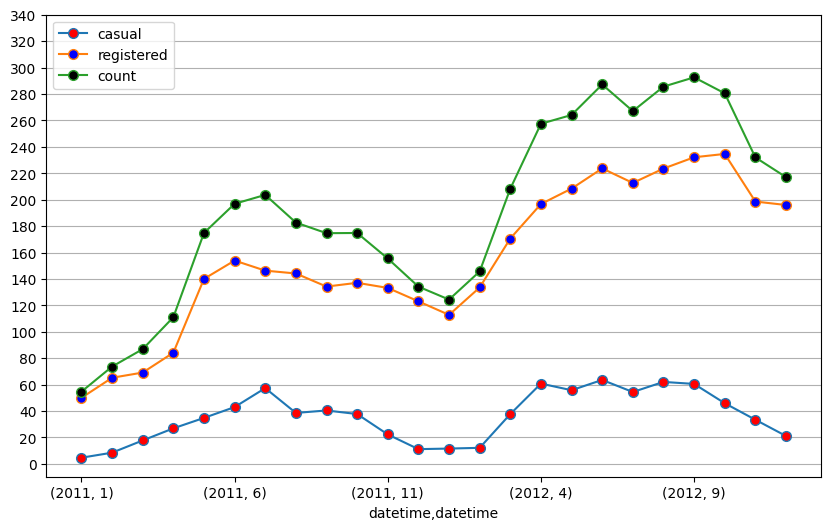

In [ ]:
plt.figure(figsize = (10, 6))
df.groupby(by = [df['datetime'].dt.year,df['datetime'].dt.month])['casual'].mean().plot(kind = "line", legend = "casual", marker = "o", ms = 7, mfc = "r")
df.groupby(by = [df['datetime'].dt.year,df['datetime'].dt.month])['registered'].mean().plot(kind = "line", legend = "registered", marker = "o", ms = 7, mfc = "b")
df.groupby(by = [df['datetime'].dt.year,df['datetime'].dt.month])['count'].mean().plot(kind = "line", legend = "count", marker = "o", ms = 7, mfc = "k")
plt.grid(axis="y")
plt.yticks(np.arange(0, 351, 20))
plt.show()

# Using resample

In [ ]:
# It will ease our operation as it allows resampling on a monthly and yearly basis.
df.set_index("datetime",inplace=True)

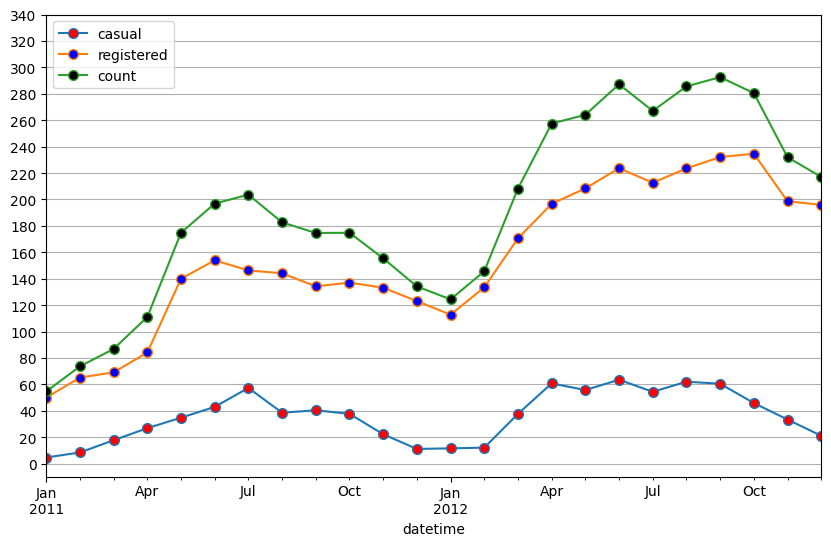

In [ ]:
# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value
# of 'casual', 'registered' and 'count' users for each month
plt.figure(figsize = (10, 6))
df.resample("M")["casual"].mean().plot(kind = "line", legend = "casual", marker = "o", ms = 7, mfc = "r")
df.resample("M")["registered"].mean().plot(kind = "line", legend = "registered", marker = "o", ms = 7, mfc = "b")
df.resample("M")["count"].mean().plot(kind = "line", legend = "count", marker = "o", ms = 7, mfc = "k")
plt.grid(axis="y")
plt.yticks(np.arange(0, 351, 20))
plt.show()

%increase in the average yearly count of rental bikes from the year 2011 to 2012.

In [ ]:
# to_frame() is used to convert series data into dataframe
df1 = df.resample("Y")["count"].mean().to_frame().reset_index()
df1

,datetime,count
0,2011-12-31,144.223349
1,2012-12-31,238.560944


In [ ]:
df1 = df.resample("Y")["count"].mean().to_frame().reset_index()
df1["previous_count"] = df1["count"].shift(1)
df1["growth_pecentage_by_year"] = (df1["count"]-df1["previous_count"])*100/(df1["previous_count"])
df1

,datetime,count,previous_count,growth_pecentage_by_year
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764




*   From the above data we can see that there is a significant rise in demand of bikes in current year(2012) than previous year(2011).
*   The yearly mean count of rental bikes is 144 for the year 2011 and 239 for the year 2012.



In [ ]:
df.reset_index(inplace=True)

Average distribution of rental bikes on monthly basis

In [ ]:
df1 = df.groupby(by=df["datetime"].dt.month)["count"].mean().reset_index()
df1.rename(columns = {"datetime":"Month"}, inplace=True)
df1["prev_count"] = df1["count"].shift(1)
df1["growth_pecentage"] = (df1["count"]-df1["prev_count"])*100/(df1["prev_count"])
df1.set_index("Month",inplace=True)


*   The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.
*   The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
*   From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
*   The count further declines from October to December, with the largest drop observed between October and November (-14.94%).





In [ ]:
df1.reset_index(inplace=True)


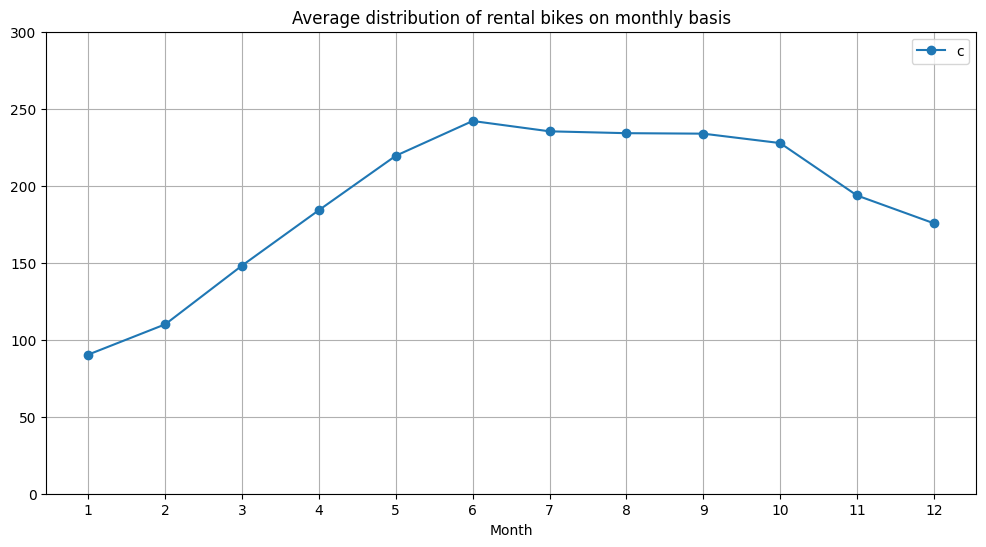

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Average distribution of rental bikes on monthly basis")
df1.groupby(by=df1["Month"])["count"].mean().plot(kind="line",marker="o")
plt.xticks(np.arange(1, 13)) # Setting the xticks to show the months from 1 to 12
plt.yticks(np.arange(0,350,50))
plt.legend("count")
plt.grid(axis="both")
plt.show()



*   The average hourly count of rental bikes is the highest in the month of June followed by July and August.

*   The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

*   Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.





In [ ]:
df.reset_index(drop=True, inplace=True)

Average distribution of rental bikes on hourly basis

In [ ]:
df1 = df.groupby(by=df["datetime"].dt.hour)["count"].mean().reset_index()
df1.rename(columns={"datetime":"hour"},inplace=True)
df1.set_index("hour",inplace=True)
df1["prev_count"]=df1["count"].shift(1)
df1["growth_percentage"]=(df1["count"]-df1["prev_count"])*100/(df1["prev_count"])



In [ ]:
df1.reset_index(inplace=True)

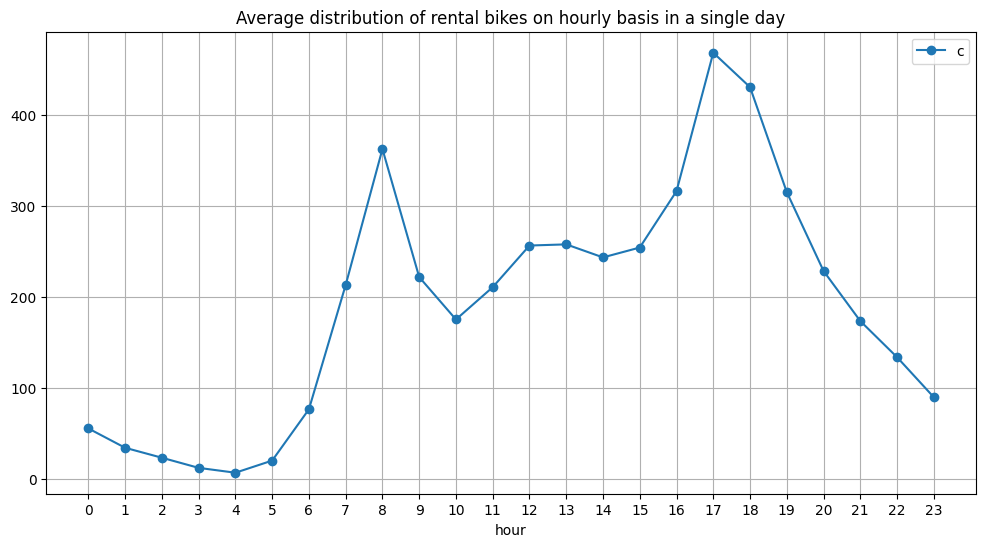

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Average distribution of rental bikes on hourly basis in a single day")
df1.groupby(by=df1["hour"])["count"].mean().plot(kind="line",marker="o")
plt.xticks(np.arange(0,24)) # Setting the xticks to show the hours from 0 to 24
plt.legend("count")
plt.grid(axis="both")
plt.show()



*   The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 PM of the day.

*   The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

*   These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.








Basic information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
def season_category(x):
  if x==1:
    return "spring"
  elif x==2:
    return "summer"
  elif x==3:
    return "fall"
  else:
    return "winter"
df["season"] = df["season"].apply(season_category)


Basic description of the Dataset

In [ ]:
df.describe()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
np.round(df["season"].value_counts(normalize=True)*100,2)

winter    25.11
summer    25.11
fall      25.11
spring    24.67
Name: season, dtype: float64

In [ ]:
np.round(df["holiday"].value_counts(normalize=True)*100,2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [ ]:
np.round(df["workingday"].value_counts(normalize=True)*100,2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [ ]:
np.round(df["weather"].value_counts(normalize=True)*100,2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

Distribution of season:

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


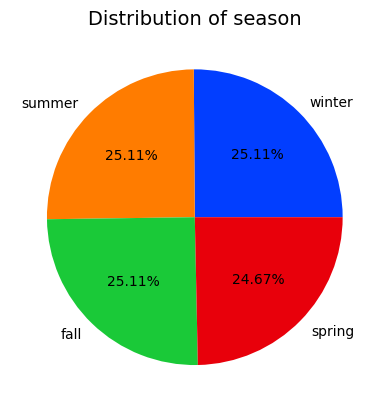

In [ ]:
df_season = np.round(df["season"].value_counts(normalize = True) * 100, 2).to_frame()
palette_color = sns.color_palette("bright")
plt.pie(x=df_season["season"], labels=df_season.index, colors=palette_color,autopct='%.2f%%')
plt.title("Distribution of season",fontsize=14)
plt.show()

Distribution of holiday:

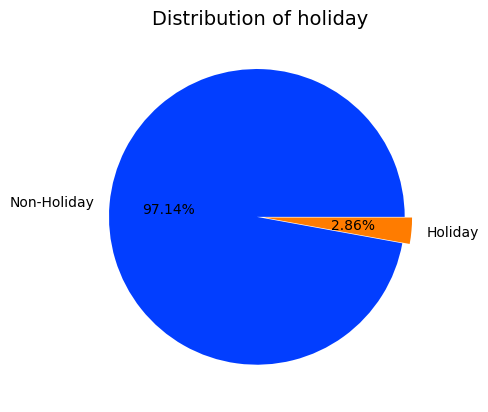

In [ ]:
df_holiday = np.round(df["holiday"].value_counts(normalize = True) * 100, 2).to_frame()
palette_color = sns.color_palette("bright")
plt.pie(x=df_holiday["holiday"], labels=["Non-Holiday","Holiday"], colors=palette_color, explode=[0.025,0.025], autopct='%.2f%%')
plt.title("Distribution of holiday",fontsize=14)
plt.show()

Distribution of Workingday

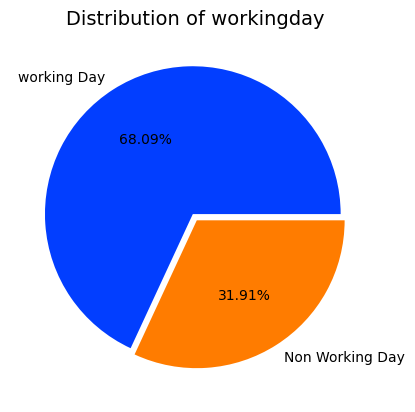

In [ ]:
df_workingday = np.round(df["workingday"].value_counts(normalize = True) * 100, 2).to_frame()
palette_color = sns.color_palette("bright")
plt.pie(x=df_workingday["workingday"], labels=["working Day","Non Working Day"], colors=palette_color, explode=[0.025,0.025], autopct='%.2f%%')
plt.title("Distribution of workingday",fontsize=14)
plt.show()

Distribution of Weather

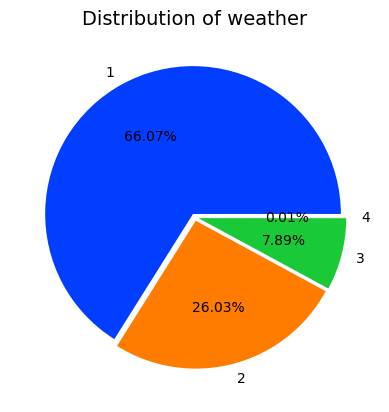

In [ ]:
df_weather = np.round(df["weather"].value_counts(normalize = True) * 100, 2).to_frame()
palette_color = sns.color_palette("bright")
plt.pie(x=df_weather["weather"], labels=df_weather.index, colors=palette_color, explode=[0.025,0.025,0.025,0.025], autopct='%.2f%%')
plt.title("Distribution of weather",fontsize=14)
plt.show()

# Univariate Analysis

Categorical Variables

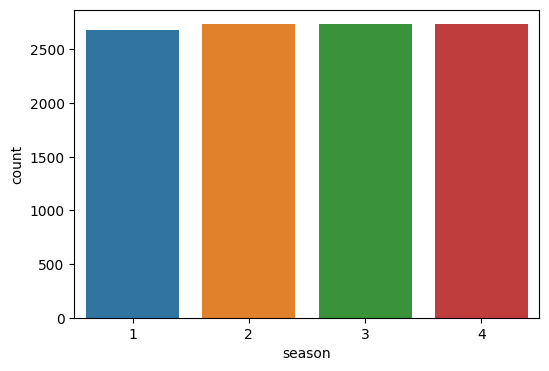

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="season")
plt.show()

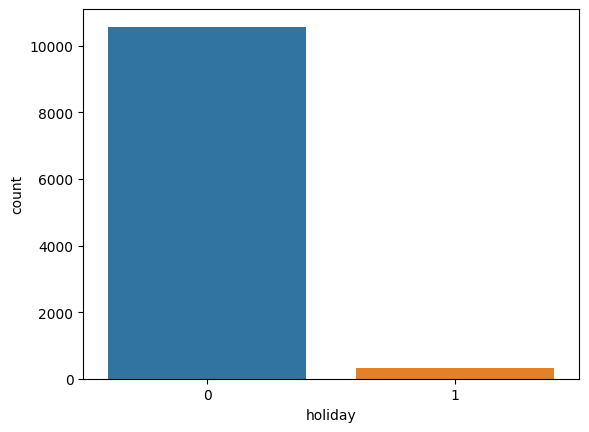

In [ ]:
sns.countplot(data=df, x="holiday")
plt.show()

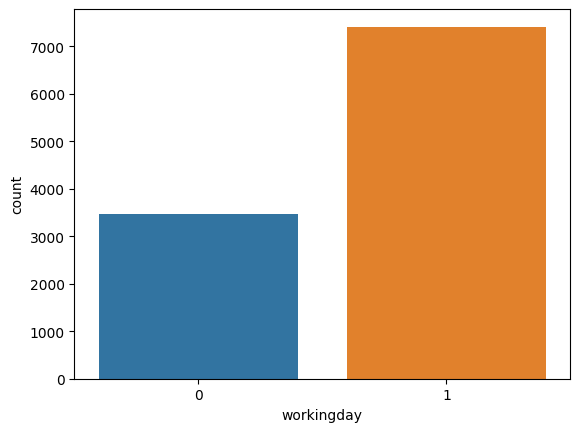

In [ ]:
sns.countplot(data=df, x="workingday")
plt.show()

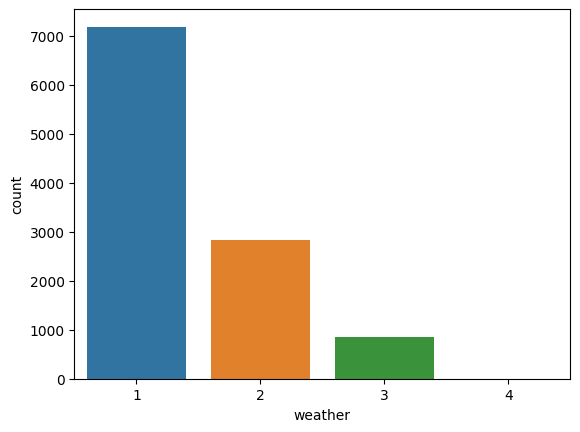

In [ ]:
sns.countplot(data=df, x="weather")
plt.show()

Continuous variables

Temperature

[]

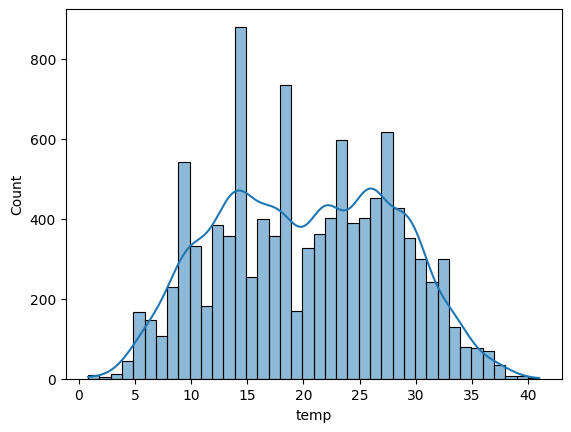

In [ ]:
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()



*   The mean and the standard deviation of temp column is 20.23 and 7.79 degrees respectively.



[]

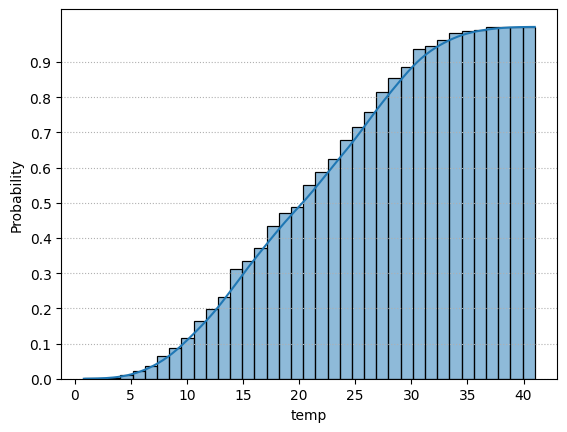

In [ ]:
sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'probability')
plt.grid(axis = 'y', linestyle = 'dotted')
plt.yticks(np.arange(0,1,0.1))
plt.plot()

It can be inferred from the graph that probability of temperature is below 30 degree celsius is about 0.9.


Humidity

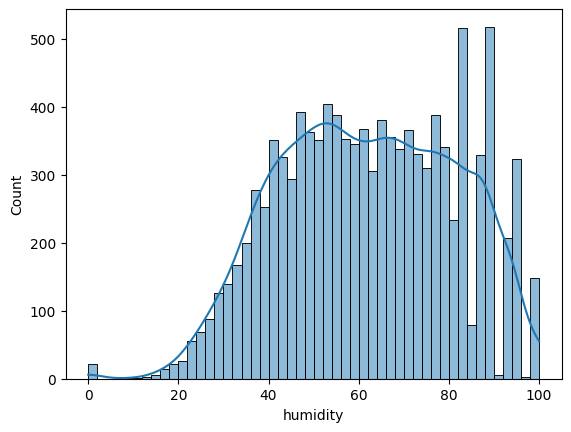

In [ ]:
sns.histplot(data=df, x="humidity", kde=True, bins=50)
plt.show()

In [ ]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)



*   The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively



[]

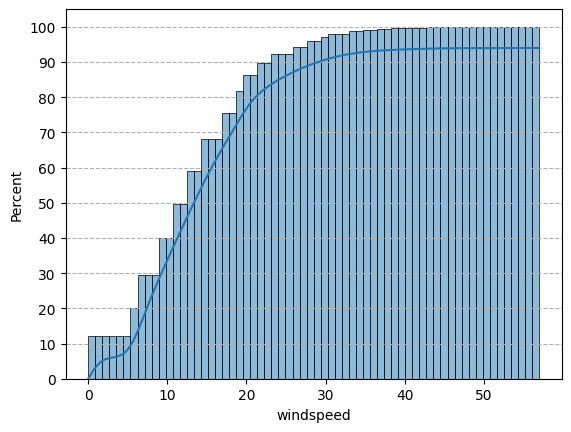

In [ ]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()



*   More than 85 % of the total windspeed data has a value of less than 20.



In [ ]:
len(df[df['windspeed'] < 20])*100 / len(df)

86.26676465184642

# Outliers Detection

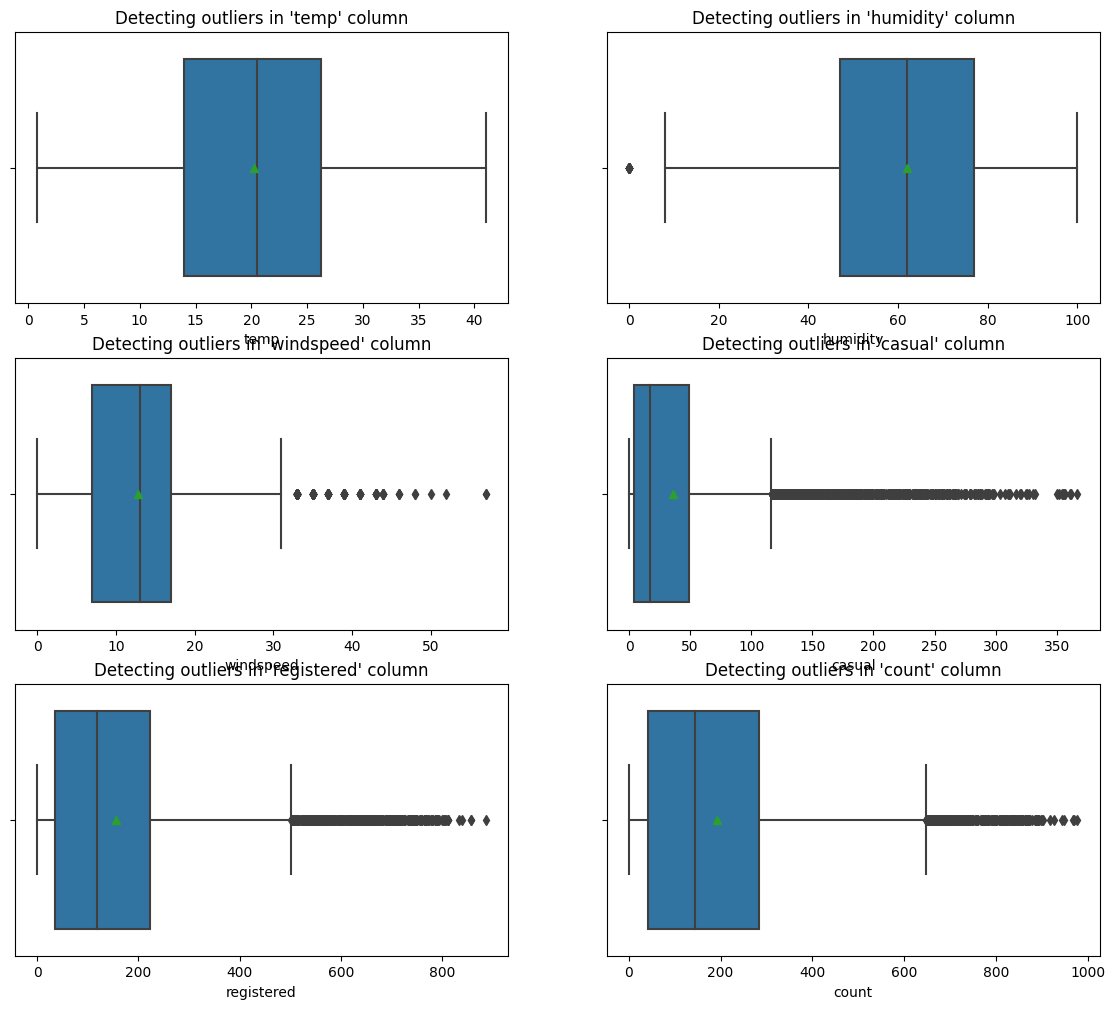

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1
plt.figure(figsize = (14, 12))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], showmeans = True)
    plt.plot()
    count += 1



*   There is no outlier in the temp column.
*   There are few outliers in humidity colun.
*   There are many outliers in the columns such as windspeed, casual, registered and count.



# Bivariate Analysis

Distribution of count of total renatal bikes across all seasons

[]

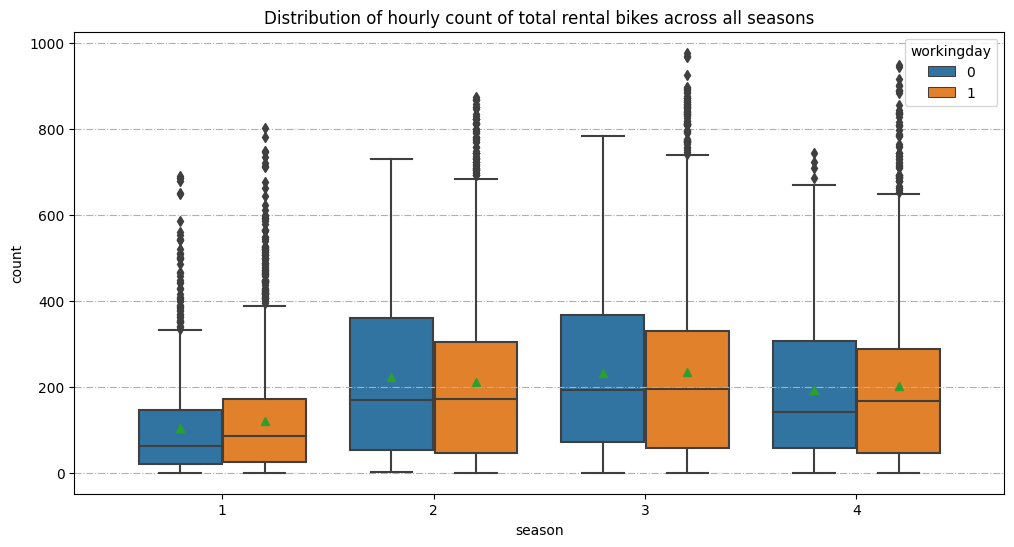

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = 'dashdot')
plt.plot()



*   It can be seen from the graph that in all the seasons except spring the count of rental bikes is more on working days.
*   spring has high amount of rental bikes on the holiday or either on weekend.



[]

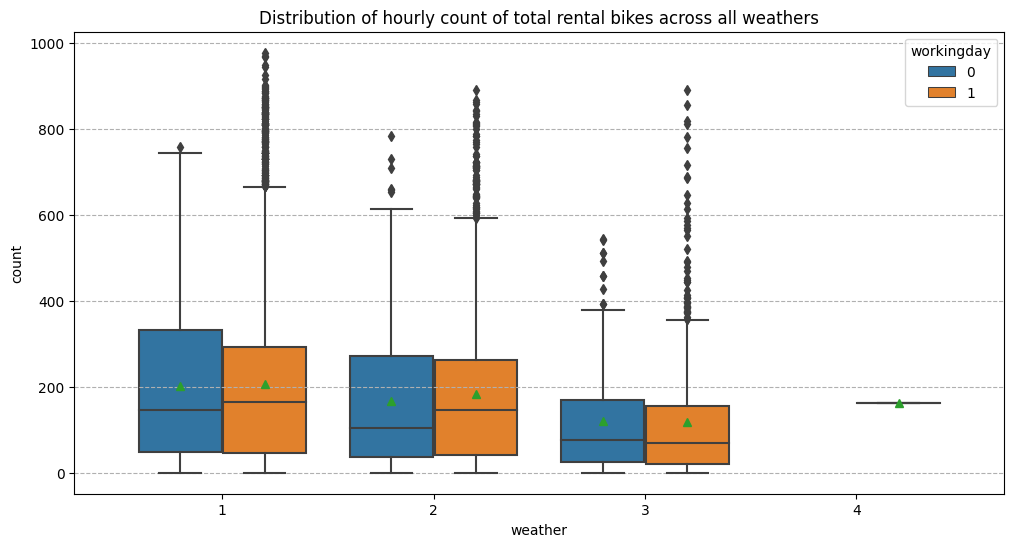

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()



*   The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and light rainy weather. There are very few records for adverse environmental conditions.



# Is there any effect of working day on the number of electric cycles rented?

# T-Test

Step 1 : Set up null and alternative hypothesis

In [ ]:
# H0: working day does not have any effect on numner of electric cycles rented
# HA: Working day has some effect on number of electric cycles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

In [ ]:
# Distribution check using QQ Plot
# Applying shapiro-wilk for normallity
# Homogeneity of Variances using Levene's test

# QQ plot

In [ ]:
from statsmodels.graphics.gofplots import qqplot

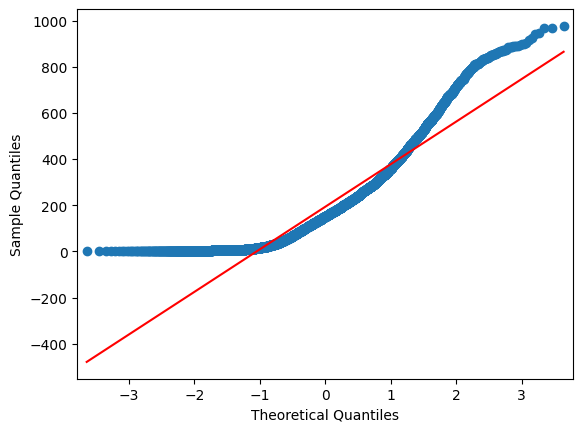

In [ ]:
qqplot(df[df["workingday"] == 1]["count"],line="s")
plt.show()

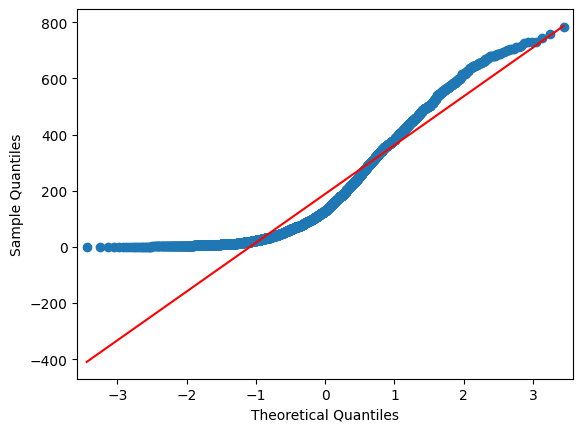

In [ ]:
qqplot(df[df["workingday"] == 0]["count"],line="s")
plt.show()

It can be inferred from the above plots that the distributions do not follow normal distribution.

# Applying shapiro-wilk for Normality distribution.

H0: The sample follows normal distribution

Ha: The sample does not follow normal distribution.

In [ ]:
from scipy.stats import shapiro

In [ ]:
test_stat, p_value = shapiro(df[df["holiday"] == 1]["count"])
print("p-value", p_value)
if p_value < 0.05:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

p-value 5.859704133590396e-14
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df[df["holiday"] == 0]["count"])
print("p-value", p_value)
if p_value < 0.05:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

p-value 0.0
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Homogenity of variances using levene's test

In [ ]:
from scipy.stats import levene

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = levene(df[df["holiday"] == 1]["count"],
                                df[df['holiday'] == 0]["count"])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9991178954732041
The samples have Homogenous Variance 


Step 3: Define Test statistics, compute p-value and fix value of alpha.

In [ ]:
alpha=0.05

In [ ]:
count_holiday = list(df[df["workingday"]==0]["count"])

In [ ]:
count_working_day = list(df[df["workingday"]==1]["count"])

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_stat, p_value = ttest_ind(count_holiday, count_working_day)
p_value

0.22644804226361348

In [ ]:
# H0: working day does not have any effect on numner of electric cycles rented
# HA: Working day has some effect on number of electric cycles rented

Step 4 : Compare p-value and alpha

Based on p-value, we will accept or reject H0.

*   p-val > alpha : Accept H0

*   p-val < alpha : Reject H0



In [ ]:
if p_value<alpha:
  print("reject null hypothesis")
  print("Working day has some effect on number of electric cycles rented")
else:
  print("reject alternative hypothesis")
  print("working day does not have any effect on numner of electric cycles rented")

reject alternative hypothesis
working day does not have any effect on numner of electric cycles rented


# Visual Tests to know if the samples follow normal distribution

[]

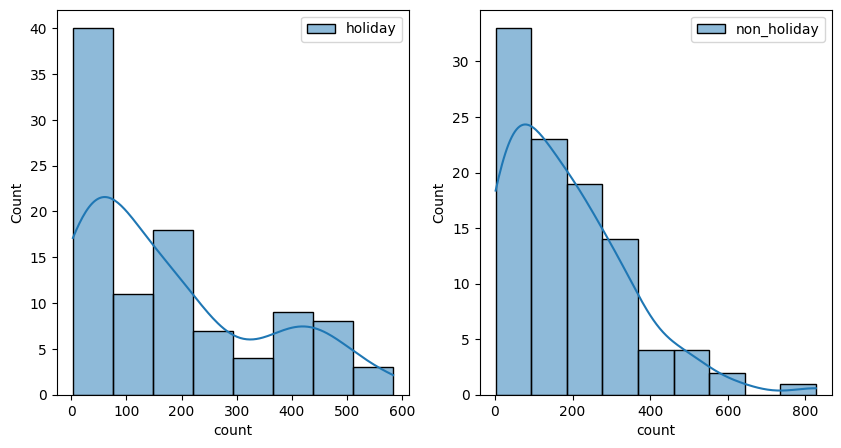

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df["holiday"] == 1]["count"].sample(100), kde = True, label = "holiday")
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df[df["holiday"] == 0]["count"].sample(100), kde = True, label = "non_holiday")
plt.legend()
plt.plot()

# Is weather dependent on the season ?

STEP-1 : Set up Null Hypothesis

*   Null Hypothesis ( H0 ) - weather is independent of
season

*   Alternate Hypothesis ( HA ) - weather is dependent of seasons



STEP-2: Define Test statistics



*   Since we have two categorical features, the Chi- square
test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

STEP-3: compute the p-value and fix value of alpha

In [ ]:
pd.crosstab(df["season"],df["weather"],values=df["count"], aggfunc=np.sum).replace(np.nan,0)

weather,1,2,3,4
season,,,,
fall,470116.0,139386.0,31160.0,0.0
spring,223009.0,76406.0,12919.0,164.0
summer,426350.0,134177.0,27755.0,0.0
winter,356588.0,157191.0,30255.0,0.0


we can remove weather 4, becuase the rented bikes are way lesser than, and in fall, summer, winter, there are zero number of rental bikes.

In [ ]:
cross_table = pd.crosstab(df["season"],df[df["weather"]!=4]["weather"],values=df["count"], aggfunc=np.sum).replace(np.nan,0)
cross_table

weather,1,2,3
season,,,
fall,470116,139386,31160
spring,223009,76406,12919
summer,426350,134177,27755
winter,356588,157191,30255


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_test_stat, p_value, dof, expected = chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


Step - 4: Comparing p value with significance level

In [ ]:
if p_value < alpha:
    print("Reject Null Hypothesis")
    print("weather is dependent of season")
else:
    print("Failed to reject Null Hypothesis")
    print("weather is indpendent of season")

Reject Null Hypothesis
weather is dependent of season


Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

# Is the number of cycles rented is similar or different in different season ?

In [ ]:
df_season_spring = df[df["season"] == "spring"]["count"]
df_season_summer = df[df["season"] == "summer"]["count"]
df_season_fall = df[df["season"] == "fall"]["count"]
df_season_winter = df[df["season"] == "winter"]["count"]

STEP-1 : Set up Null Hypothesis




*   Null Hypothesis ( H0 ) - rental bikes per hour is same for all seasons.
*   Alternate Hypothesis ( HA ) -rental bikes per hour is different for all seasons.



*STEP-2* : Checking for basic assumpitons for the hypothesis

*   Normality check using QQ Plot.

*   Homogeneity of Variances using Levene's test

*   Each observations are independent.



# QQ Plot

In [ ]:
from statsmodels.graphics.gofplots import qqplot

[]

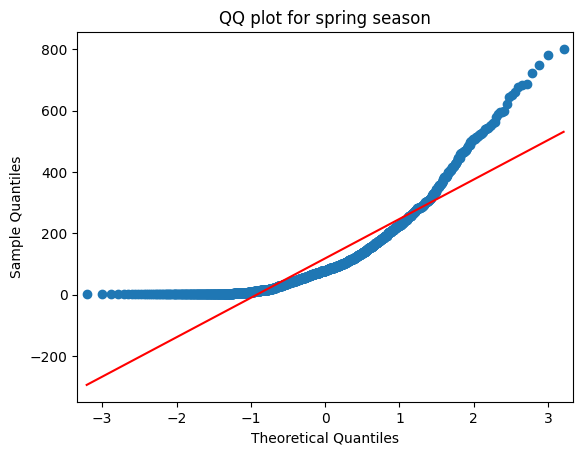

In [ ]:
qqplot(df_season_spring.sample(1500),line="s")
plt.title("QQ plot for spring season")
plt.plot()

[]

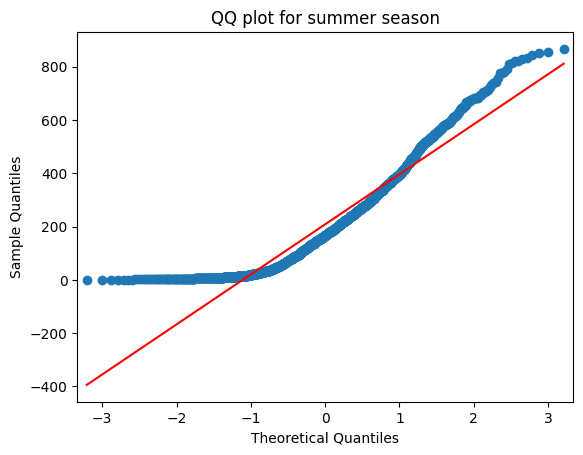

In [ ]:
qqplot(df_season_summer.sample(1500),line="s")
plt.title("QQ plot for summer season")
plt.plot()

[]

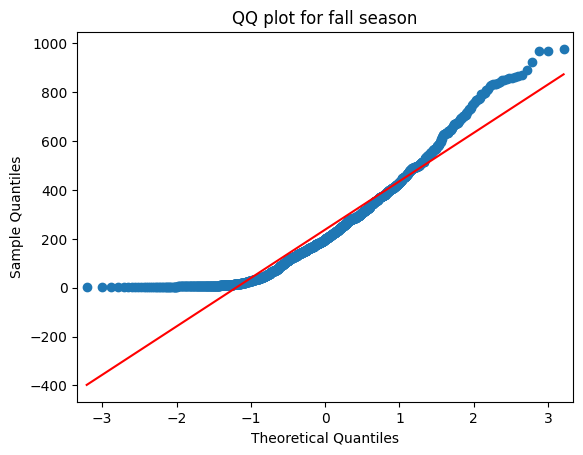

In [ ]:
qqplot(df_season_fall.sample(1500),line="s")
plt.title("QQ plot for fall season")
plt.plot()

[]

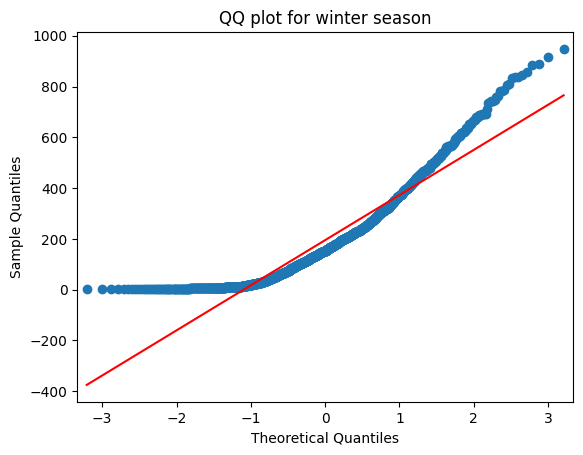

In [ ]:
qqplot(df_season_winter.sample(1500),line="s")
plt.title("QQ plot for winter season")
plt.plot()

# Shapiro-wilk density for Normality

H0 : The sample follows normal distribution

HA : The sample does not follow normal distribution

alpha = 0.05

In [ ]:
test_stat, p_value = shapiro(df_season_spring.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.939006218192869e-39
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_summer.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.837676022929321e-29
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_fall.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.80978796182364e-29
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = shapiro(df_season_winter.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1953562588612423e-30
The sample does not follow normal distribution


# Homogenity of variances using levene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = levene(df_season_spring.sample(1500),
                                df_season_summer.sample(1500),
                                df_season_fall.sample(1500),
                                df_season_winter.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.589787837780493e-77
The samples do not have  Homogenous Variance


STEP-4: Decide the kind of test.

since the samples are not normally distributed and do not have same variance, we can not perform f_oneway test that is why we perform kruskal-wallis for independent samples.

In [ ]:
from scipy.stats import kruskal

In [ ]:
t_stat, p_value = kruskal(df_season_spring, df_season_summer, df_season_fall, df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 1.222306875221986e-06
p value = 2.479008372608633e-151


In [ ]:
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis')
    print('rental bikes per hour is different for all seasons')
else:
    print('Failed to reject Null Hypothesis')
    print('rental bikes per hour is same for all seasons')

Therefore, the average number of rental bikes is statistically different for different seasons.

# Insights:



*  The total time period for which the data is given is '718 days 23:00:00'.

*   Out of every 100 users, around 19 are casual users and 81 are registered users.

*   The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

*   There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

*   There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

*   The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

*   The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

*   There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

*   The hourly total number of rental bikes is statistically different for different weathers.



# Recommendations

Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.